# Flight Delay Analysis
We will use logistic regression to predict delay in flights 

In [42]:
#importing all the required libraries and packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,ConfusionMatrixDisplay
%matplotlib inline 

In [43]:
# reading the dataset
data=pd.read_csv("FlightDelays.csv")
data.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime


In [44]:
data.info()
data.isnull().values.any()
# We have 13 features and 2201 instances with after checking for null values we find no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2201 entries, 0 to 2200
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CRS_DEP_TIME   2201 non-null   int64 
 1   CARRIER        2201 non-null   object
 2   DEP_TIME       2201 non-null   int64 
 3   DEST           2201 non-null   object
 4   DISTANCE       2201 non-null   int64 
 5   FL_DATE        2201 non-null   object
 6   FL_NUM         2201 non-null   int64 
 7   ORIGIN         2201 non-null   object
 8   Weather        2201 non-null   int64 
 9   DAY_WEEK       2201 non-null   int64 
 10  DAY_OF_MONTH   2201 non-null   int64 
 11  TAIL_NUM       2201 non-null   object
 12  Flight Status  2201 non-null   object
dtypes: int64(7), object(6)
memory usage: 223.7+ KB


False

In [45]:
#stats of the data
data.describe()

,CRS_DEP_TIME,DEP_TIME,DISTANCE,FL_NUM,Weather,DAY_WEEK,DAY_OF_MONTH
count,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000
mean,1371.938664,1369.298955,211.871422,3815.086324,0.014539,3.905498,16.024989
std,432.697149,442.462754,13.316815,2409.750224,0.119725,1.903149,8.677390
min,600.000000,10.000000,169.000000,746.000000,0.000000,1.000000,1.000000
25%,1000.000000,1004.000000,213.000000,2156.000000,0.000000,2.000000,8.000000
50%,1455.000000,1450.000000,214.000000,2385.000000,0.000000,4.000000,16.000000
75%,1710.000000,1709.000000,214.000000,6155.000000,0.000000,5.000000,23.000000
max,2130.000000,2330.000000,229.000000,7924.000000,1.000000,7.000000,31.000000


In [46]:
data["Flight Status"].value_counts()
# The number of flights that were ontime are 1773 and that were delayed are 428

ontime     1773
delayed     428
Name: Flight Status, dtype: int64

[Text(0, 0.5, 'Ontime %'), Text(0.5, 0, 'Carriers')]

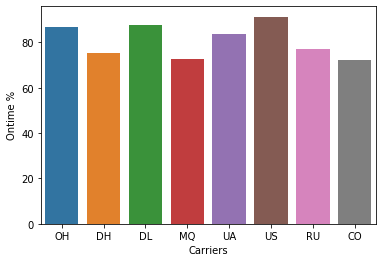

In [47]:
#percentage of flights ontime according to the carrriers

carrier_percent=[]
for i in data["CARRIER"].unique().tolist():
    time = data[data['CARRIER'] == i]['Flight Status'].value_counts()['ontime']
    late = data[data['CARRIER'] == i]['Flight Status'].value_counts()['delayed']
    percentage=time/(time+late)*100
    carrier_percent.append(percentage)
fig=sns.barplot(x=data["CARRIER"].unique().tolist(),y=carrier_percent)
fig.set(xlabel="Carriers",ylabel="Ontime %")
    
    


In [48]:
carrier_percent

[86.66666666666667,
 75.1361161524501,
 87.88659793814433,
 72.88135593220339,
 83.87096774193549,
 91.33663366336634,
 76.9607843137255,
 72.3404255319149]

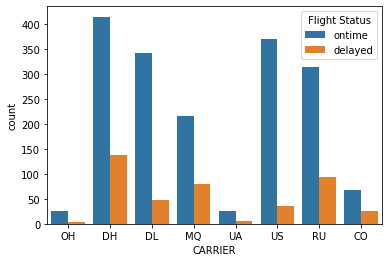

In [49]:
sns.countplot(x="CARRIER", hue="Flight Status", data=data)

[Text(0, 0.5, 'Ontime %'), Text(0.5, 0, 'Destination')]

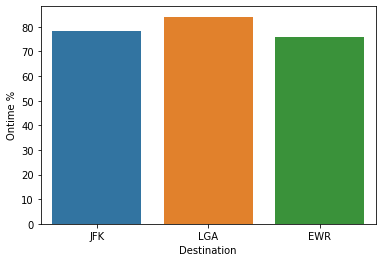

In [50]:
#percentage of flights ontime according to the destination
dest_percent=[]
for i in data["DEST"].unique().tolist():
    time = data[data['DEST'] == i]['Flight Status'].value_counts()['ontime']
    late = data[data['DEST'] == i]['Flight Status'].value_counts()['delayed']
    percentage=time/(time+late)*100
    dest_percent.append(percentage)
fig =sns.barplot(x=data["DEST"].unique().tolist(),y=dest_percent)
fig.set(xlabel="Destination",ylabel="Ontime %")

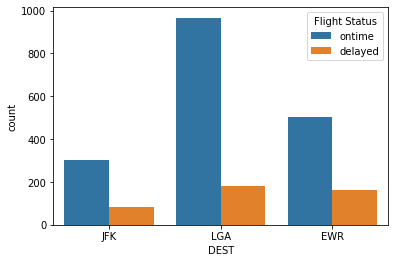

In [51]:
sns.countplot(x="DEST", hue="Flight Status", data=data)

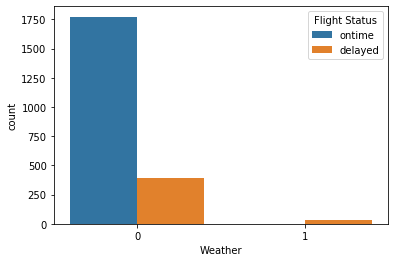

In [52]:
sns.countplot(x="Weather", hue="Flight Status", data=data)

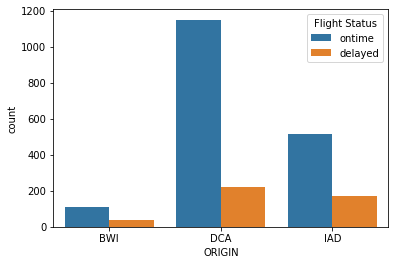

In [53]:
sns.countplot(x="ORIGIN",hue="Flight Status",data=data)

[Text(0, 0.5, 'Ontime %'), Text(0.5, 0, 'Origin')]

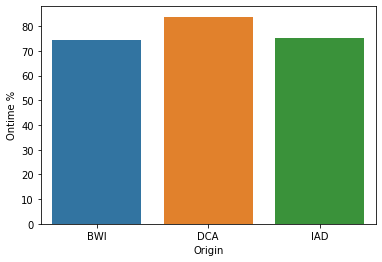

In [54]:
#percentage of flights ontime according to the origin

origin_percent=[]
for i in data["ORIGIN"].unique().tolist():
    time = data[data['ORIGIN'] == i]['Flight Status'].value_counts()['ontime']
    late = data[data['ORIGIN'] == i]['Flight Status'].value_counts()['delayed']
    percentage=time/(time+late)*100
    origin_percent.append(percentage)
fig =sns.barplot(x=data["ORIGIN"].unique().tolist(),y=origin_percent)
fig.set(xlabel="Origin",ylabel="Ontime %")


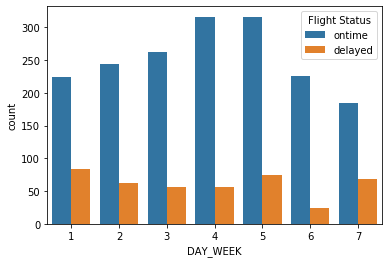

In [55]:
sns.countplot(x="DAY_WEEK",hue="Flight Status",data=data)

[Text(0, 0.5, 'Ontime %'), Text(0.5, 0, 'Day of the Week')]

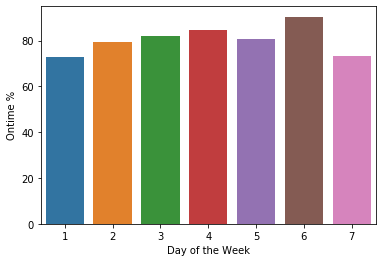

In [56]:
#percentage of flights ontime according to the day
day_percent=[]
for i in data["DAY_WEEK"].unique().tolist():
    time = data[data['DAY_WEEK'] == i]['Flight Status'].value_counts()['ontime']
    late = data[data['DAY_WEEK'] == i]['Flight Status'].value_counts()['delayed']
    percentage=time/(time+late)*100
    day_percent.append(percentage)
fig =sns.barplot(x=data["DAY_WEEK"].unique().tolist(),y=day_percent)
fig.set(xlabel="Day of the Week",ylabel="Ontime %")


In [57]:
day_percent

[84.67741935483872,
 80.81841432225065,
 90.4,
 73.12252964426878,
 72.72727272727273,
 79.47882736156352,
 82.1875]

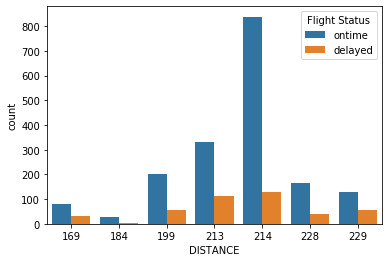

In [58]:
sns.countplot(x='DISTANCE',hue='Flight Status',data=data)

[Text(0, 0.5, 'Ontime %'), Text(0.5, 0, 'Distance')]

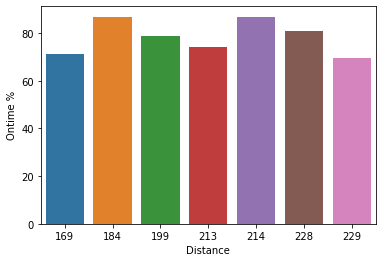

In [59]:
#percentage of flights ontime according to the distance
dist_percent=[]
for i in data["DISTANCE"].unique().tolist():
    time = data[data['DISTANCE'] == i]['Flight Status'].value_counts()['ontime']
    late = data[data['DISTANCE'] == i]['Flight Status'].value_counts()['delayed']
    percentage=time/(time+late)*100
    dist_percent.append(percentage)
fig =sns.barplot(x=data["DISTANCE"].unique().tolist(),y=dist_percent)
fig.set(xlabel="Distance",ylabel="Ontime %")

In [60]:
#changing time into intervals of hours for easier use in analysis
data['CRS_DEP_TIME']=data['CRS_DEP_TIME'].divide(100)




In [61]:
data['CRS_DEP_TIME']=data['CRS_DEP_TIME'].astype('int32')

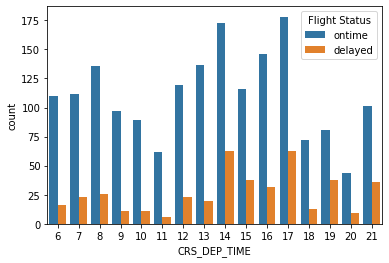

In [62]:
sns.countplot(x='CRS_DEP_TIME',hue='Flight Status',data=data)


[Text(0, 0.5, 'Ontime %'), Text(0.5, 0, 'Hour')]

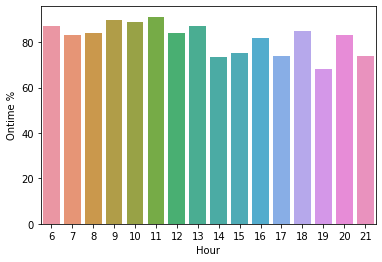

In [63]:
#percentage of flights ontime according to the time

time_percent=[]
for i in data["CRS_DEP_TIME"].unique().tolist():
    time = data[data['CRS_DEP_TIME'] == i]['Flight Status'].value_counts()['ontime']
    late = data[data['CRS_DEP_TIME'] == i]['Flight Status'].value_counts()['delayed']
    percentage=time/(time+late)*100
    time_percent.append(percentage)
fig =sns.barplot(x=data["CRS_DEP_TIME"].unique().tolist(),y=time_percent)
fig.set(xlabel="Hour",ylabel="Ontime %")

In [64]:
time_percent

[73.30508474576271,
 82.02247191011236,
 83.80281690140845,
 73.85892116182573,
 89.0,
 83.9506172839506,
 73.72262773722628,
 89.81481481481481,
 83.01886792452831,
 75.32467532467533,
 87.3015873015873,
 84.70588235294117,
 87.26114649681529,
 68.0672268907563,
 91.17647058823529,
 82.96296296296296]

In [65]:
#creating dummy variables for the categorical data

carrier=pd.get_dummies(data["CARRIER"])
dest=pd.get_dummies(data["DEST"])
origin=pd.get_dummies(data["ORIGIN"])
status=pd.get_dummies(data["Flight Status"],drop_first=True)
time=pd.get_dummies(data["CRS_DEP_TIME"])
day=pd.get_dummies(data["DAY_WEEK"])
data=pd.concat([data,carrier,origin,status,dest,time,day],axis=1)

data=data.drop(['CARRIER','DEST','ORIGIN','Flight Status','FL_DATE','TAIL_NUM','CRS_DEP_TIME','DEP_TIME','FL_NUM','DAY_WEEK'],axis=1)
data.head()

,DISTANCE,Weather,DAY_OF_MONTH,CO,DH,DL,MQ,OH,RU,UA,...,19,20,21,1,2,3,4,5,6,7
0,184,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,213,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,229,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,229,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,229,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [25]:
#scaling the features and then appling logistic regression model

x=data.drop(['ontime'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,data['ontime'],test_size=0.4,random_state=10)
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
model=LogisticRegression(penalty='l1',solver='liblinear')
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
y_pred=model.predict(x_test)


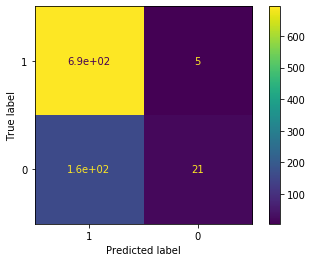

In [27]:
#confusion matrix 
class_labels = data['ontime'].unique()
cm = confusion_matrix(y_test, y_pred, labels=class_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot()

In [28]:
accuracy_score(y_test,y_pred)

0.811577752553916

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.12      0.20       182
           1       0.81      0.99      0.89       699

    accuracy                           0.81       881
   macro avg       0.81      0.55      0.55       881
weighted avg       0.81      0.81      0.75       881



In [30]:
#coefficients for the model obtained
odds = model.coef_[0]
# odds=np.absolute(odds)
pd.DataFrame(odds,x.columns,columns=['coef']).sort_values(by='coef',ascending=False)

,coef
US,0.568860
DL,0.475449
11,0.302305
10,0.296319
6,0.257685
6,0.229587
4,0.166530
OH,0.152324
9,0.126566
8,0.124203


In [69]:
#dropping the features with no significant correlation and then applying logistic regression on the datatset with less number 
#of features

new_data=data.drop(['DCA','DISTANCE',18,2,16,15,'RU','JFK','MQ','IAD'],axis=1)
new_x=data.drop(['ontime'],axis=1)
new_x_train,new_x_test,new_y_train,new_y_test=train_test_split(new_x,data['ontime'],test_size=0.4,random_state=10)
scaler = StandardScaler()
scaler.fit(new_x_train)
new_x_train = scaler.transform(new_x_train)
new_x_test = scaler.transform(new_x_test)
new_model=LogisticRegression(penalty='l1',solver='liblinear')
new_model.fit(new_x_train,new_y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
#accuracy for the new model
new_y_pred=new_model.predict(new_x_test)
accuracy_score(new_y_test,new_y_pred)

0.811577752553916

In [71]:
print(classification_report(new_y_test,new_y_pred))

              precision    recall  f1-score   support

           0       0.81      0.12      0.20       182
           1       0.81      0.99      0.89       699

    accuracy                           0.81       881
   macro avg       0.81      0.55      0.55       881
weighted avg       0.81      0.81      0.75       881



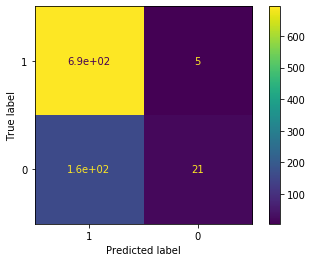

In [72]:
class_labels = data['ontime'].unique()
cm = confusion_matrix(new_y_test, new_y_pred, labels=class_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot()